In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import george
from george.kernels import ExpSquaredKernel
import pandas as pd   

Load the data

In [2]:
data = pd.read_csv("../data/sun_sample.txt", delim_whitespace=True)
period = np.array(data["period"])
perr = np.array(data["perr"])
teff = np.array(data["teff"])
terr = np.array(data["terr"])
age = np.array(data["age"])
aerr = np.array(data["aerr"])
z = np.array(data["z"])
zerr = np.array(data["zerr"])
data

,kid,mass,merr,age,aerr,z,zerr,period,perr,teff,terr
0,6116048,1.01,0.030,6.23,0.370,0.0118,0.0011,17.26,1.960,6072,49
1,7871531,0.84,0.020,9.15,0.470,0.0125,0.0014,33.72,2.600,5378,57
2,8006161,1.04,0.020,5.04,0.170,0.0427,0.0052,29.79,3.090,5264,104
3,9098294,1.00,0.030,7.28,0.510,0.0143,0.0018,19.79,1.330,6020,51
4,9955598,0.89,0.020,6.72,0.200,0.0231,0.0017,34.20,5.640,5434,77
5,10454113,1.19,0.040,2.03,0.290,0.0168,0.0012,14.61,1.090,6197,45
6,10644253,1.13,0.050,1.07,0.250,0.0239,0.0024,10.91,0.870,6069,50
7,10963065,1.05,0.020,4.30,0.230,0.0118,0.0010,12.58,1.700,6316,45
8,11244118,1.10,0.050,6.43,0.580,0.0272,0.0034,23.17,3.890,5618,64
9,12009504,1.12,0.030,3.64,0.260,0.0152,0.0011,9.39,0.680,6270,61


/Users/ruthangus/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


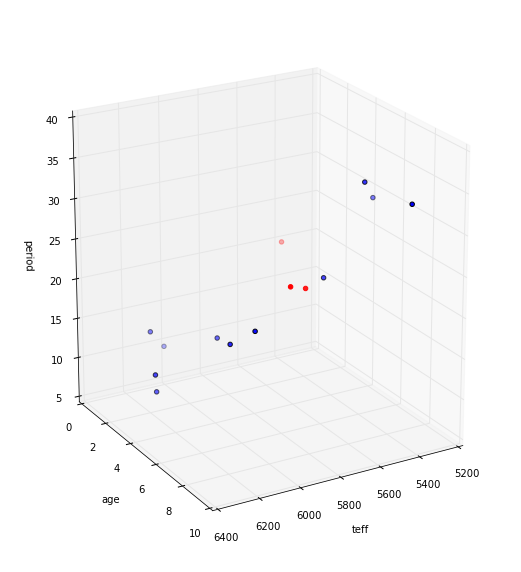

In [5]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(teff[:-3], age[:-3], period[:-3])
ax.scatter(teff[-3:], age[-3:], period[-3:], color="r")
ax.set_xlabel("teff")
ax.set_ylabel("age")
ax.set_zlabel("period")
ax.view_init(20, 60)

/Users/ruthangus/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


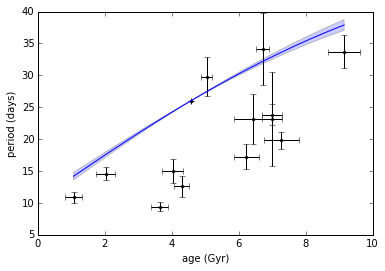

In [18]:
x, y, xerr, yerr = age, period, aerr, perr
plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt="k.")
plt.ylabel("period (days)")
plt.xlabel("age (Gyr)")

# GP prediction
A, l = 10, 20 # , 600, .8, .3
k = A**2 * ExpSquaredKernel(l**2)
gp = george.GP(k)
gp.compute(x, yerr)
#gp.optimize(x, y, yerr)
xs = np.linspace(min(x), max(x), 1000)
mu, cov = gp.predict(y, xs)  # do the prediction
v = np.diag(cov)**.5
plt.plot(xs, mu)
plt.fill_between(xs, mu-v, mu+v, alpha=.2)

/Users/ruthangus/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


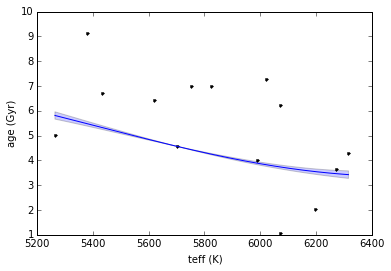

In [19]:
plt.plot(teff, age, "k.")
plt.xlabel("teff (K)")
plt.ylabel("age (Gyr)")

# GP prediction
A, l = 10, 2000
k = A**2 * ExpSquaredKernel(l**2)
gp = george.GP(k)
gp.compute(teff, aerr)
#gp.optimize(teff, age, aerr)
xs = np.linspace(min(teff), max(teff), 1000)
mu, cov = gp.predict(age, xs)  # do the prediction
v = np.diag(cov)**.5
plt.plot(xs, mu)
plt.fill_between(xs, mu-v, mu+v, alpha=.2)

Optimization terminated successfully.


/Users/ruthangus/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


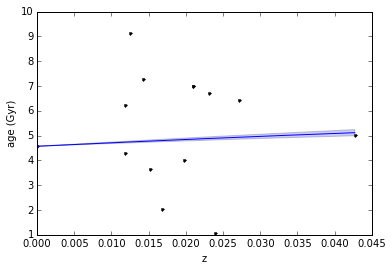

In [20]:
plt.plot(z, age, "k.")
plt.xlabel("z")
plt.ylabel("age (Gyr)")

# GP prediction
A, l = 10, .8
k = A**2 * ExpSquaredKernel(l**2)
gp = george.GP(k)
gp.compute(z, aerr)
gp.optimize(z, age, aerr)
xs = np.linspace(min(z), max(z), 1000)
mu, cov = gp.predict(age, xs)  # do the prediction
v = np.diag(cov)**.5
plt.plot(xs, mu)
plt.fill_between(xs, mu-v, mu+v, alpha=.2)

Now do the 3d version


In [91]:
# set your x, y z and hyperparameters
D = np.vstack((teff, period)).T
A, lt, lp = 10, 2000, 50

# GP prediction
k = A**2 * ExpSquaredKernel([lt**2, lp**2], ndim=2)
gp = george.GP(k)
gp.compute(D, aerr)

xs = np.zeros((1, 2))
xs[0, 0] = 5700
xs[0, 1] = 26

mu, cov = gp.predict(age, xs)  # do the prediction
print mu
v = np.diag(cov)**.5

[ 4.57009367]
